In [111]:
from fastai.tabular import *

In [124]:
# Dataset : kaggle competitions download -c titanic
dfTrain = pd.read_csv('train.csv')
dfTrain.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
dfTest = pd.read_csv('test.csv')
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [214]:
print(dfTest.isna().sum(),"\n \n----------------- \n")
print(dfTrain.isna().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64 
 
----------------- 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [151]:
# Comme il y a 1 NaN en Fare dans le jeu de test qui n'est pas modifié par défaut dans celui d'entraînement,
# on le remplace manuellement par la moyenne
dfTest["Fare"] = dfTest["Fare"].fillna(dfTest["Fare"].mean())

In [127]:
dep_var = 'Survived' # Variable à expliquer
# cat_names = ['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',"Ticket","Cabin","Embarked"] 77%
# cat_names = ['Pclass', 'Sex', 'SibSp', 'Parch',"Ticket","Embarked"] # 80%
cat_names = ['Pclass', 'Sex', 'SibSp', 'Parch'] # Catégories
cont_names = ['Age', 'Fare'] # Variables "numériques" (aka pseudo continues)
procs = [FillMissing, Categorify, Normalize] # Fonctions utilisées pour uniformiser le jeu de données

In [153]:
# Création du jeu de donnée de test
datatest = TabularList.from_df(dfTest, cat_names=cat_names, cont_names=cont_names, procs=procs)


In [198]:
data = (TabularList.from_df(dfTrain, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(400,600))) #Jeu de validation 
                           .label_from_df(cols=dep_var)
                           .add_test(datatest) # Sera utilisé à la fin, pour avoir les résultats du passage du modèle sur le jeu de test
                           .databunch())

In [199]:
data.show_batch(rows=5)

Pclass,Sex,SibSp,Parch,Age_na,Age,Fare,target
2,female,0,0,False,0.8207,-0.3458,1
1,female,0,0,False,0.0517,-0.0051,1
1,female,1,0,False,0.4362,1.1673,1
3,female,1,0,False,0.1286,-0.2955,0
3,male,0,0,False,-0.7943,-0.3737,0


In [200]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy) ""

In [201]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.576680,0.623545,0.650000,00:00
1,0.513908,0.594371,0.650000,00:00
2,0.484825,0.560675,0.718182,00:00
3,0.473199,0.537175,0.768182,00:00
4,0.460542,0.444594,0.827273,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


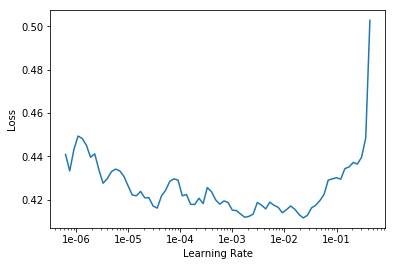

In [202]:
learn.lr_find()
learn.recorder.plot()

In [203]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(3e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.406160,0.424884,0.822727,00:00
1,0.406469,0.418984,0.836364,00:00
2,0.412076,0.417008,0.836364,00:00
3,0.412654,0.417115,0.827273,00:00
4,0.413773,0.417149,0.827273,00:00
5,0.414235,0.418332,0.831818,00:00
6,0.416209,0.418586,0.827273,00:00
7,0.416131,0.416283,0.827273,00:00
8,0.413925,0.416841,0.831818,00:00
9,0.412276,0.416792,0.831818,00:00


In [204]:
learn.export()

In [221]:
preds,y=learn.get_preds(ds_type=DatasetType.Test)
preds

tensor([[3.0356e-01, 6.9644e-01],
        [5.3812e-02, 9.4619e-01],
        [6.7455e-02, 9.3254e-01],
        [3.0356e-01, 6.9644e-01],
        [3.3527e-02, 9.6647e-01],
        [3.0354e-01, 6.9646e-01],
        [6.6523e-02, 9.3348e-01],
        [6.1829e-03, 9.9382e-01],
        [6.6520e-02, 9.3348e-01],
        [1.9557e-01, 8.0443e-01],
        [3.0356e-01, 6.9644e-01],
        [2.9141e-02, 9.7086e-01],
        [6.6956e-03, 9.9330e-01],
        [1.2108e-02, 9.8789e-01],
        [6.6960e-03, 9.9330e-01],
        [9.7608e-03, 9.9024e-01],
        [6.7427e-02, 9.3257e-01],
        [3.0355e-01, 6.9645e-01],
        [5.3806e-02, 9.4619e-01],
        [6.6526e-02, 9.3347e-01],
        [7.7963e-03, 9.9220e-01],
        [2.1802e-01, 7.8198e-01],
        [4.4595e-03, 9.9554e-01],
        [1.1197e-02, 9.8880e-01],
        [1.1903e-03, 9.9881e-01],
        [1.2376e-01, 8.7624e-01],
        [1.9677e-03, 9.9803e-01],
        [3.0355e-01, 6.9645e-01],
        [2.9140e-02, 9.7086e-01],
        [1.955

In [222]:
pred_prob, pred_class = preds.max(1) # A définir ce qui se passe exactement, mais retourne un tenseur avec les valeurs max
# de proba entre les deux prédictions dans pred_prob, et la prédiction dans pred_max
pred_class

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [207]:
# Crée un Df avec l'id des passagers et la prédiction
submission = pd.DataFrame({'PassengerId':dfTest['PassengerId'],'Survived':pred_class})

In [208]:
submission.to_csv('SubmissionTitanic2.csv', index=False)

In [172]:
# A confirmer si la soumission par ligne de commande marche
!kaggle competitions submit -c titanic -f SubmissionTitanic.csv -m "Fastai"

100%|████████████████████████████████████████| 2.77k/2.77k [00:02<00:00, 975B/s]
Successfully submitted to Titanic: Machine Learning from Disaster